In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df_train = pd.read_csv(r'C:\Users\KU_0373\Downloads\santander-customer-satisfaction (1)\train.csv')

In [46]:
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


<Axes: xlabel='TARGET', ylabel='count'>

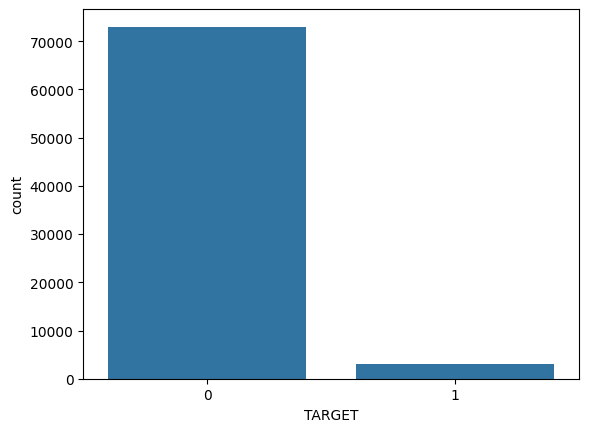

In [47]:
sns.countplot(x=df_train['TARGET'], data=df_train)
# so this imbalance data. we need to balance it by using smote.

## Our data set is df_train(train)

In [48]:
# our data is df_train
x = df_train.drop('TARGET', axis='columns')
y = df_train['TARGET']
x.shape

(76020, 370)

In [49]:
y.shape

(76020,)

In [50]:
x.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,31.879418,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,7331.340000,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07


In [51]:
y.value_counts()

TARGET
0    73012
1     3008
Name: count, dtype: int64

## Balance the data by using SMOTE

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)

In [54]:
y_sm.value_counts()
# So our data is balanced
x_sm.shape

(146024, 370)

## Remove the low variance features by using VarianceThreshold 

In [157]:
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.25) #Removing features if they having 25 or belowe 25 variance.
var_thr.fit(x_sm)

VarianceThreshold(threshold=0.25)

In [158]:
# it returns the true or false ie. true means it is true (it has more than 0 variacne
# so it is important) , false means it has low variance that is not important
var_thr.get_support()
len(x_sm.columns[var_thr.get_support()])
# tot is 370 it gives 198 if you give thershold=0.25 (198 col important)

198

In [159]:
# here we can columns which having less than o.25 variance
constant_columns = [col for col in x_sm.columns if col not in x_sm.columns[var_thr.get_support()]]

In [160]:
# these are deleted cols
len(constant_columns)

172

In [161]:
x_final = x_sm.drop(constant_columns, axis=1)
x_final.shape
# so finally we have independant_features are 198.(by using variance_thershold)

(146024, 198)

In [162]:
x_final.shape

(146024, 198)

In [163]:
y_sm.shape

(146024,)

## Split the dataset into train and test

In [164]:
# so our finally data is x_final and y_sm.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_final, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

## LogisticRegression

In [165]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

C:\Users\KU_0373\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [166]:
lr.score(x_test, y_test)

0.5642184557438795

## DecisionTreeClassifier

In [167]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc.score(x_test, y_test)

0.9475089881869543

## RandomForestClassifier

In [168]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.9638418079096045

## SVM

In [ ]:
# from sklearn.svm import SVC
# svc = SVC(C=1.0, kernel='rbf', gamma='scale')
# svc.fit(x_train, y_train)
# svc.score(x_test, y_test)

In [169]:
import pandas as pd
df_test = pd.read_csv(r'C:\Users\KU_0373\Downloads\santander-customer-satisfaction (1)\test.csv')
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [170]:
df_test.shape

(75818, 370)

In [171]:
x_final.shape

(146024, 198)

In [83]:
# so our model is trained with features of 198 and 146024 cols.
# so we need to remove the features for df_test by using variance_threshold.

## Remove the low-variance features for df_test by using variance_threshold

In [172]:
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.24) #Removing both constant and quasi-constant
var_thr.fit(df_test)

VarianceThreshold(threshold=0.24)

In [173]:
# it returns the true or false ie. true means it is true (it has more than 0 variacne
# so it is important) , false means it has low variance that is not important
var_thr.get_support()
len(df_test.columns[var_thr.get_support()])
# tot is 370 it gives 197 if you give thershold=0.25 (197 col important)

198

In [174]:
# here we can columns which having less than o.25 variance
constant_columns = [col for col in df_test.columns if col not in df_test.columns[var_thr.get_support()]]

In [175]:
# these are deleted cols
len(constant_columns)

172

In [176]:
df_test_final = df_test.drop(constant_columns, axis=1)
df_test_final.shape
# so finally we have independant_features are 198.(by using variance_thershold)

(75818, 198)

In [177]:
# so our x_sm and df_test_final features are same, now predict the values for df_test_final
test_predict = rfc.predict(df_test_final.values)

C:\Users\KU_0373\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [189]:
test_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [182]:
df_train.count()

ID                         76020
var3                       76020
var15                      76020
imp_ent_var16_ult1         76020
imp_op_var39_comer_ult1    76020
                           ...  
saldo_medio_var44_hace3    76020
saldo_medio_var44_ult1     76020
saldo_medio_var44_ult3     76020
var38                      76020
TARGET                     76020
Length: 371, dtype: int64

In [184]:
df_test.count()

ID                         75818
var3                       75818
var15                      75818
imp_ent_var16_ult1         75818
imp_op_var39_comer_ult1    75818
                           ...  
saldo_medio_var44_hace2    75818
saldo_medio_var44_hace3    75818
saldo_medio_var44_ult1     75818
saldo_medio_var44_ult3     75818
var38                      75818
Length: 370, dtype: int64

In [185]:
df_sample = pd.read_csv(r'C:\Users\KU_0373\Downloads\santander-customer-satisfaction (1)\sample_submission.csv')
df_sample.head()

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0


In [190]:
count_0 = 0
count_1 = 0
for i in test_predict:
    if i == 1:
        count_1 += 1
    else:
        count_0 += 1
print(f'count_1 is {count_1}')
print(f'count_0 is {count_0}')

count_1 is 934
count_0 is 74884
